### 1. 搭建的神经网络，使用olivettiface数据集进行训练。

In [5]:
# 导包
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from torch_nn import TorchNN

In [15]:
# 初始化参数
lr = 0.01
epochs = 300

In [6]:
# 加载 Olivetti Faces 数据集
X, y = fetch_olivetti_faces(data_home="./fdata", return_X_y=True)
print("数据集中图像的维度", X.shape) # (400, 64*64)
print("数据集中图像的数量：", len(X)) # 400
print("数据集中目标标签的数量：", len(y)) # 400

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) 

# 转换为 PyTorch 的 Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
# 训练集 320张64*64照片 输出320个对应的标签项
print(X_train_tensor.shape)
print(y_train_tensor.shape)
# 测试集 80张64*64照片 输出80个对应的标签项
print(X_test_tensor.shape)
print(y_test_tensor.shape)

# 创建数据集和数据加载器
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

数据集中图像的维度 (400, 4096)
数据集中图像的数量： 400
数据集中目标标签的数量： 400
torch.Size([320, 4096])
torch.Size([320])
torch.Size([80, 4096])
torch.Size([80])


In [8]:
# 定义迭代训练函数
def train_iter(model, epochs, train_loader, lr):
    loss_hist_list = []
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in range(epochs):
        for images, label in train_loader:
            y_hat = model(images)
            # print(y_hat.shape) (320, 40)
            loss = loss_fn(y_hat, label)
            optimizer.zero_grad() # 与nn.zero_grad()对等
            loss.backward()
            optimizer.step()
        print(f"epoch: {epoch}, loss: {loss.item()}")
        loss_hist_list.append(loss.item())
    return loss_hist_list
        

In [9]:
# 定义测试验证函数
def test_train(model, test_loader):
    total = 0
    correct = 0
    with torch.no_grad():
        for images, label in test_loader:
            y_hat = model(images)
            max_val, max_idx = torch.max(y_hat, dim=1)
            total += y_hat.size(0)
            correct += (max_idx == label).sum().item()
        print(f"total: {total}, correct: {correct}")
    return correct/total * 100

In [10]:
# 定义损失梯度图像函数
def draw_loss_hist(loss_his_list):
    plt.plot(loss_his_list)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

In [19]:
model = nn.Sequential(
    nn.Linear(4096, 2028),
    nn.ReLU(),
    nn.Linear(2028, 256),
    nn.ReLU(),
    nn.Linear(256, 40),
)

# 使用自定义的model
# model = TorchNN()

In [20]:
# 训练模型
loss_his_list = train_iter(model, epochs, train_loader, lr)

epoch: 0, loss: 3.679655075073242
epoch: 1, loss: 3.6933279037475586
epoch: 2, loss: 3.672969341278076
epoch: 3, loss: 3.6943626403808594
epoch: 4, loss: 3.6678919792175293
epoch: 5, loss: 3.6685307025909424
epoch: 6, loss: 3.642213821411133
epoch: 7, loss: 3.6498544216156006
epoch: 8, loss: 3.629668712615967
epoch: 9, loss: 3.640005111694336
epoch: 10, loss: 3.649723529815674
epoch: 11, loss: 3.62809681892395
epoch: 12, loss: 3.641273260116577
epoch: 13, loss: 3.6732354164123535
epoch: 14, loss: 3.5970826148986816
epoch: 15, loss: 3.612375497817993
epoch: 16, loss: 3.5972111225128174
epoch: 17, loss: 3.61903715133667
epoch: 18, loss: 3.5909523963928223
epoch: 19, loss: 3.606262683868408
epoch: 20, loss: 3.619851589202881
epoch: 21, loss: 3.5451972484588623
epoch: 22, loss: 3.574526309967041
epoch: 23, loss: 3.5295157432556152
epoch: 24, loss: 3.5932445526123047
epoch: 25, loss: 3.5974514484405518
epoch: 26, loss: 3.5310044288635254
epoch: 27, loss: 3.5425665378570557
epoch: 28, loss: 

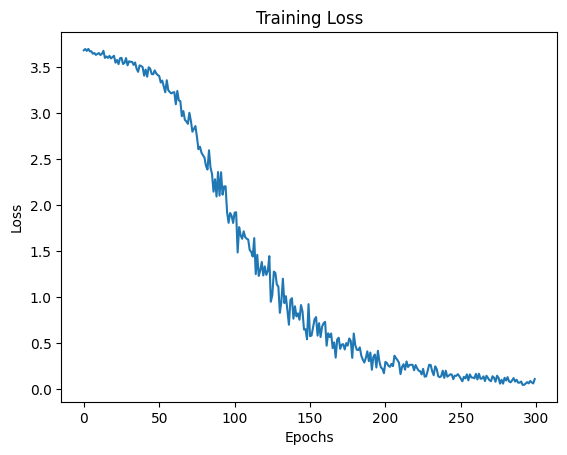

In [21]:
# 绘制损失梯度图像
draw_loss_hist(loss_his_list)

In [22]:
# 测试模型
accuracy = test_train(model, test_loader)
print(f"模型在测试集上的准确率: {accuracy:.2f}%")

total: 80, correct: 72
模型在测试集上的准确率: 90.00%
